### EDA and Data Exploration

In [1]:
# loading in the data
import pandas as pd

data_path = "/Users/Clara/Desktop/ANLY590/Project/590-Group-Project/data/joined_weather_data_complete.csv"


df = pd.read_csv(data_path, low_memory=False)
df.head()

,Unnamed: 0,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,...,humidity,precipcover,precip,temp,maxt,mint,cloudcover,weathertype,snow,local
0,0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,...,73.59,20.83,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU
1,1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,...,73.59,20.83,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU
2,2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,...,73.59,20.83,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU
3,3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,...,73.59,20.83,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU
4,4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,...,73.59,20.83,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU


In [2]:
len(df)

5228429

In [3]:
# swapping names for two columns
df.rename(columns={'unknown':'post_time', 'post_time':'unknown'}, inplace=True)

In [4]:
# removing unneeded columns and getting datatypes
df = df.drop(df.columns[0], axis=1)
df.dtypes

track_id               object
race_date              object
race_number             int64
program_number         object
trakus_index            int64
latitude              float64
longitude             float64
distance_id             int64
course_type            object
track_condition        object
run_up_distance         int64
race_type              object
unknown               float64
post_time               int64
weight_carried          int64
jockey                 object
odds                    int64
position_at_finish      int64
day                    object
humidity              float64
precipcover           float64
precip                float64
temp                  float64
maxt                  float64
mint                  float64
cloudcover            float64
weathertype            object
snow                  float64
local                  object
dtype: object

In [5]:
# checking for null values in the trakus_index measurement
sum(df['trakus_index'].isnull())

0

In [6]:
df.groupby(['program_number']).size()

program_number
1      225826
1      374153
10      67963
10     118872
11      44952
11      72580
12      25794
12      45569
13       9927
13      16580
14       7278
14       7803
15       4274
15       3643
16       1532
16       2059
1A      56753
1X        247
2      220476
2      382121
2B       4081
3      226626
3      384399
3X        334
4      230701
4      380695
5      230192
5      376474
6      228434
6      351458
7      190198
7      296707
8      142703
8      230499
9       94753
9      171773
dtype: int64

In [7]:
# replacing the letters with unique numbers so this can be an int
df['program_number'] = df['program_number'].str.replace('A','7')
df['program_number'] = df['program_number'].str.replace('B','9')
df['program_number'] = df['program_number'].str.replace('X','8')

In [8]:
# course_type:
# M - Hurdle
# D - Dirt
# O - Outer turf
# I - Inner turf
# T - Turf

df['course_type'] = df['course_type'].str.replace('M','Hurdle')
df['course_type'] = df['course_type'].str.replace('D','Dirt')
df['course_type'] = df['course_type'].str.replace('O','Outer_turf')
df['course_type'] = df['course_type'].str.replace('I','Inner_turf')
df['course_type'] = df['course_type'].str.replace('T','Turf')

In [9]:
# race_type:
# STK - Stakes
# WCL - Waiver Claiming
# WMC - Waiver Maiden Claiming
# SST - Starter Stakes
# SHP - Starter Handicap
# CLM - Claiming
# STR - Starter Allowance
# AOC - Allowance Optional Claimer
# SOC - Starter Optional Claimer
# MCL - Maiden Claiming
# ALW - Allowance
# MSW - Maiden Special Weight

df['race_type'] = df['race_type'].str.replace('STK','Stakes')
df['race_type'] = df['race_type'].str.replace('WCL','Waiver_Claiming')
df['race_type'] = df['race_type'].str.replace('WMC','Waiver_Maiden_Claiming')
df['race_type'] = df['race_type'].str.replace('SST','Starter_Stakes')
df['race_type'] = df['race_type'].str.replace('SHP','Starter_Handicap')
df['race_type'] = df['race_type'].str.replace('CLM','Claiming')
df['race_type'] = df['race_type'].str.replace('STR','Starter_Allowance')
df['race_type'] = df['race_type'].str.replace('AOC','Allowance_Optional_Claimer')
df['race_type'] = df['race_type'].str.replace('SOC','Starter_Optional_Claimer')
df['race_type'] = df['race_type'].str.replace('MCL','Maiden_Claiming')
df['race_type'] = df['race_type'].str.replace('ALW','Allowance')
df['race_type'] = df['race_type'].str.replace('MSW','Maiden_Special_Weight')

In [10]:
# track_condition
# YL - Yielding
# FM - Firm
# SY - Sloppy
# GD - Good
# FT - Fast
# MY - Muddy
# SF - Soft

df['track_condition'] = df['track_condition'].str.replace('YL','Yielding')
df['track_condition'] = df['track_condition'].str.replace('FM','Firm')
df['track_condition'] = df['track_condition'].str.replace('SY','Sloppy')
df['track_condition'] = df['track_condition'].str.replace('GD','Good')
df['track_condition'] = df['track_condition'].str.replace('FT','Fast')
df['track_condition'] = df['track_condition'].str.replace('MY','Muddy')
df['track_condition'] = df['track_condition'].str.replace('SF','Soft')


In [11]:
# changing dates to datetime
df['race_date'] = pd.to_datetime(df['race_date'])
df['day'] = pd.to_datetime(df['day'])

In [12]:
# now let's calculate time in the race by counting trakus_index for each horse and race
df['program_number'] = df['program_number'].astype(int)
df_temp = df.groupby(['program_number', 'race_number', 'track_id', 'race_date']).size().to_frame('count').reset_index()

In [13]:
df_temp.head()

,program_number,race_number,track_id,race_date,count
0,1,1,AQU,2019-01-01,316
1,1,1,AQU,2019-01-04,394
2,1,1,AQU,2019-01-05,405
3,1,1,AQU,2019-01-10,404
4,1,1,AQU,2019-01-11,405


In [14]:
# getting seconds in race
df_temp['seconds_in_race'] = df_temp['count'] * 0.25
df_temp = df_temp.drop("count", axis=1)
df_temp.head()

,program_number,race_number,track_id,race_date,seconds_in_race
0,1,1,AQU,2019-01-01,79.00
1,1,1,AQU,2019-01-04,98.50
2,1,1,AQU,2019-01-05,101.25
3,1,1,AQU,2019-01-10,101.00
4,1,1,AQU,2019-01-11,101.25


In [15]:
# now let's join this to the complete dataset
df = pd.merge(df, df_temp, on=["program_number", "race_number", "track_id", "race_date"])
len(df)

5228429

In [16]:
df.dtypes

track_id                      object
race_date             datetime64[ns]
race_number                    int64
program_number                 int64
trakus_index                   int64
latitude                     float64
longitude                    float64
distance_id                    int64
course_type                   object
track_condition               object
run_up_distance                int64
race_type                     object
unknown                      float64
post_time                      int64
weight_carried                 int64
jockey                        object
odds                           int64
position_at_finish             int64
day                   datetime64[ns]
humidity                     float64
precipcover                  float64
precip                       float64
temp                         float64
maxt                         float64
mint                         float64
cloudcover                   float64
weathertype                   object
s

In [17]:
# removing non-quantitative variables for correlation plot
toremove = ["track_id", "course_type", "track_condition", "race_type", "jockey", "weathertype", 
            "local", "unknown"]
df_quant = df.drop(toremove, axis=1)

df_quant.head(6)

,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,run_up_distance,post_time,weight_carried,...,day,humidity,precipcover,precip,temp,maxt,mint,cloudcover,snow,seconds_in_race
0,2019-01-01,9,6,73,40.672946,-73.827587,600,48,420,120,...,2019-01-01,73.59,20.83,0.3,50.5,59.1,42.1,67.6,0.0,74.0
1,2019-01-01,9,6,74,40.672990,-73.827568,600,48,420,120,...,2019-01-01,73.59,20.83,0.3,50.5,59.1,42.1,67.6,0.0,74.0
2,2019-01-01,9,6,63,40.672510,-73.827781,600,48,420,120,...,2019-01-01,73.59,20.83,0.3,50.5,59.1,42.1,67.6,0.0,74.0
3,2019-01-01,9,6,64,40.672553,-73.827762,600,48,420,120,...,2019-01-01,73.59,20.83,0.3,50.5,59.1,42.1,67.6,0.0,74.0
4,2019-01-01,9,6,65,40.672596,-73.827742,600,48,420,120,...,2019-01-01,73.59,20.83,0.3,50.5,59.1,42.1,67.6,0.0,74.0
5,2019-01-01,9,6,66,40.672640,-73.827723,600,48,420,120,...,2019-01-01,73.59,20.83,0.3,50.5,59.1,42.1,67.6,0.0,74.0


In [18]:
# moving columns to end
# resource: https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe

cols_at_end = ['odds', 'position_at_finish', 'seconds_in_race']
df_quant = df_quant[[c for c in df_quant if c not in cols_at_end] + [c for c in cols_at_end if c in df_quant]]

(4) What factors determine the amount of time it takes a horse to finish a race? 

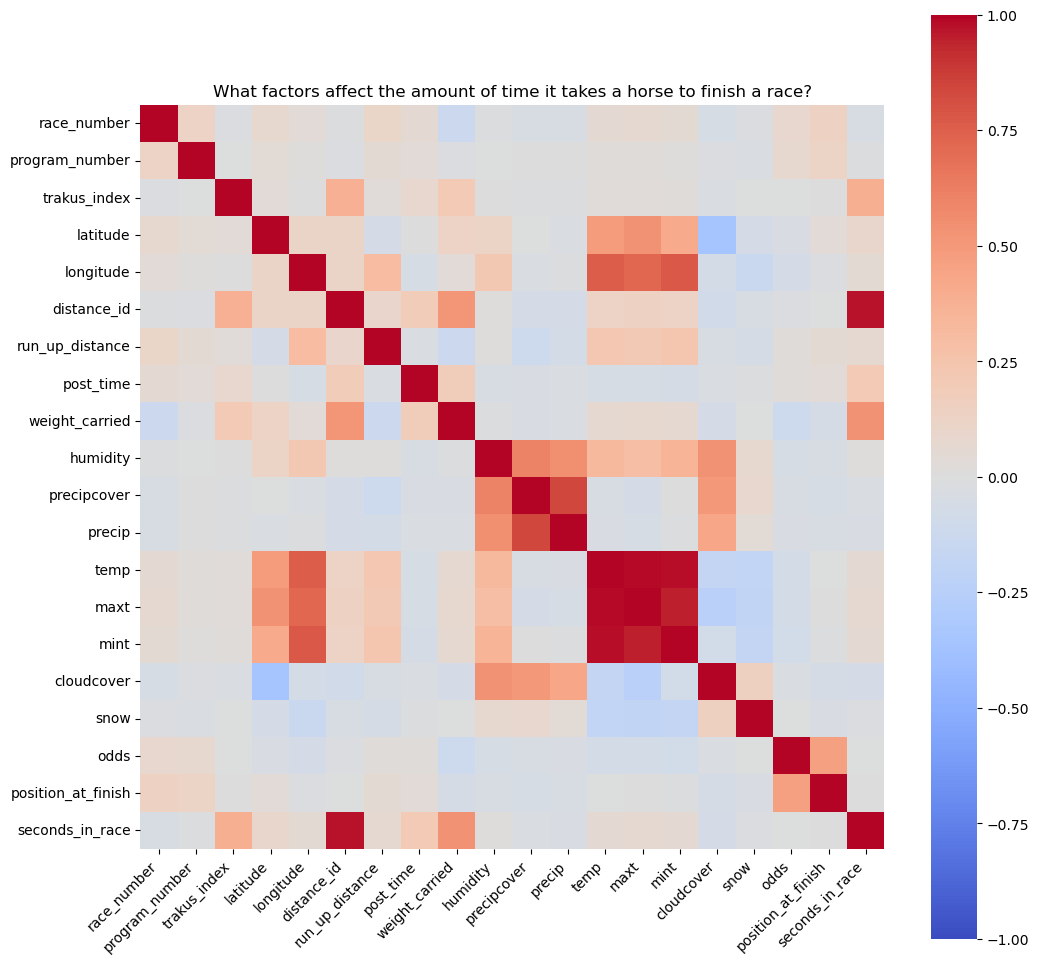

In [19]:
## Show the correlation plot of quant variables
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

rcParams['figure.figsize'] = 12,12
rcParams['figure.dpi'] = 100
corr = df_quant.corr(method='pearson')
fig, ax = plt.subplots()
sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=plt.get_cmap('coolwarm'),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.set_title('What factors affect the amount of time it takes a horse to finish a race?')

# saving
import os

newpath = r'EDA' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

plt.savefig('EDA/Q4_EDA_corr.png', bbox_inches='tight', pad_inches=0.0)

(5) Does the track type, course type, race type, or track condition play a role in determining horse performance or health? 

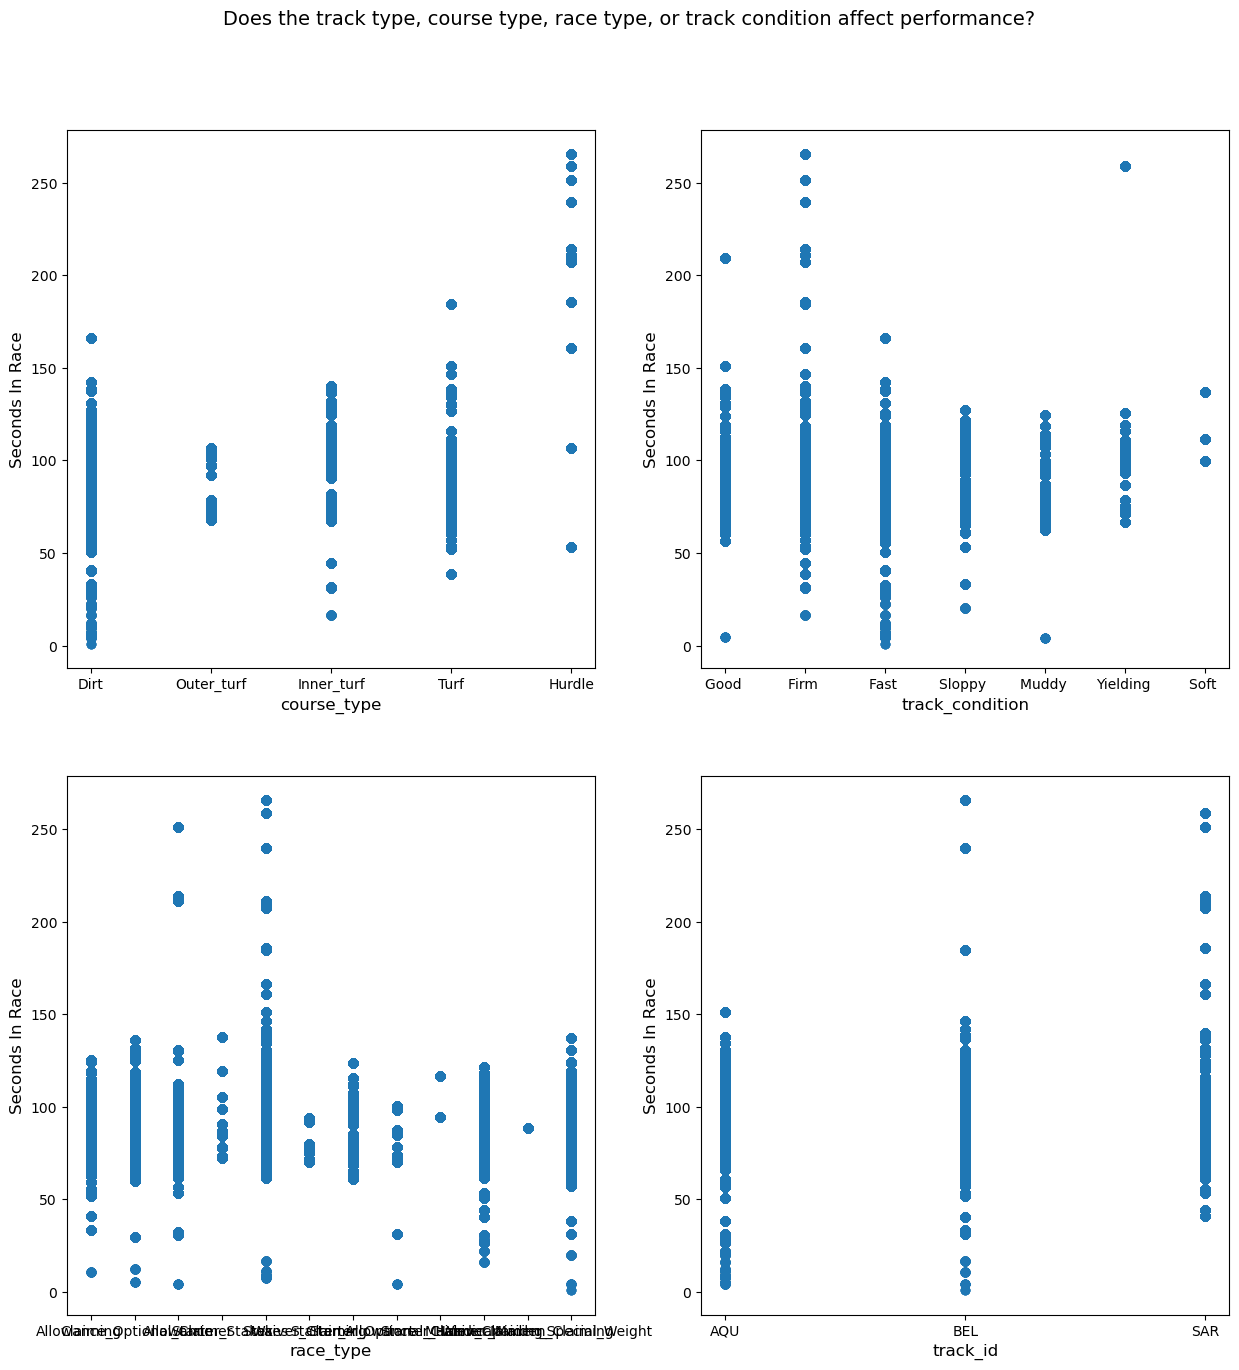

In [23]:
plt.figure(figsize=(15, 15))

features = df[["course_type", "track_condition", "race_type", "track_id"]]
target = df['seconds_in_race']

plt.rcParams['text.color'] = "black"

for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.xlabel(col, fontsize = 12)
    plt.ylabel('Seconds In Race', fontsize = 12)
    #plt.tight_layout()
plt.suptitle('Does the track type, course type, race type, or track condition affect performance?', fontsize = 14)
plt.subplots_adjust(top=0.90)
#plt.savefig('EDA/Q5_EDA_hists.png')

Text(0, 0.5, 'Seconds In Race')

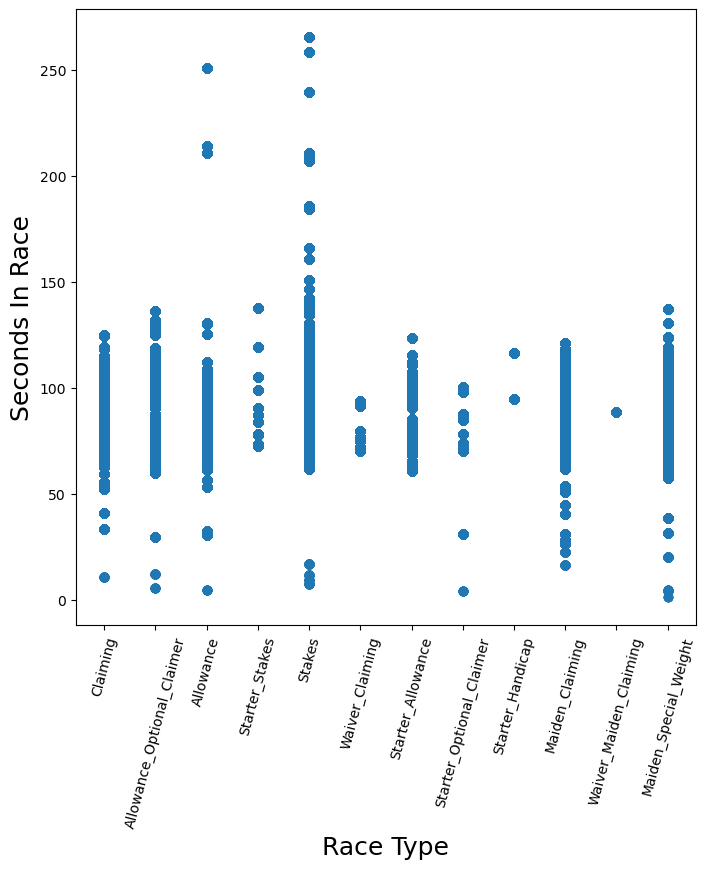

In [39]:
plt.figure(figsize=(8, 8))
x = df["race_type"]
y = target
plt.scatter(x, y, marker='o')
plt.xticks(rotation=75)
plt.xlabel("Race Type", fontsize = 18)
plt.ylabel('Seconds In Race', fontsize = 18)

Text(0, 0.5, 'Seconds In Race')

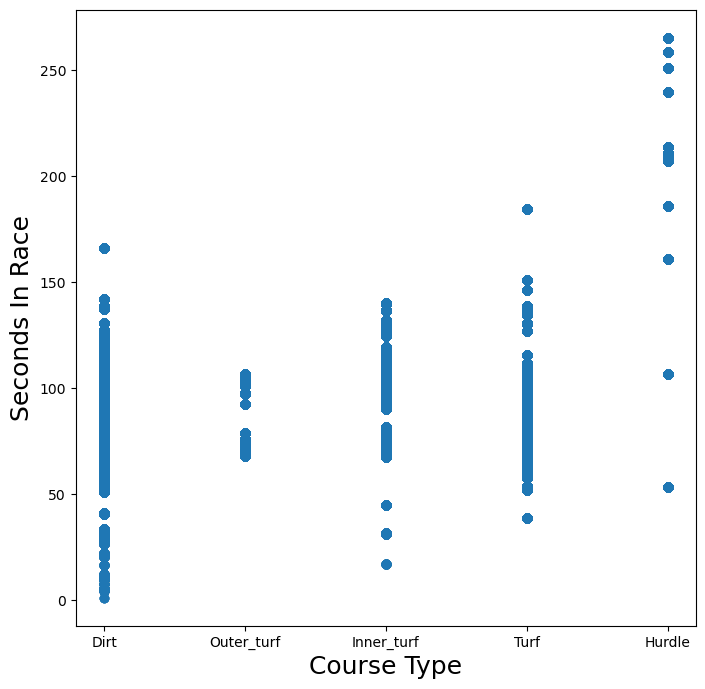

In [37]:
plt.figure(figsize=(8, 8))
x = df["course_type"]
y = target
plt.scatter(x, y, marker='o')
plt.xticks(rotation=0)
plt.xlabel("Course Type", fontsize = 18)
plt.ylabel('Seconds In Race', fontsize = 18)

Text(0, 0.5, 'Seconds In Race')

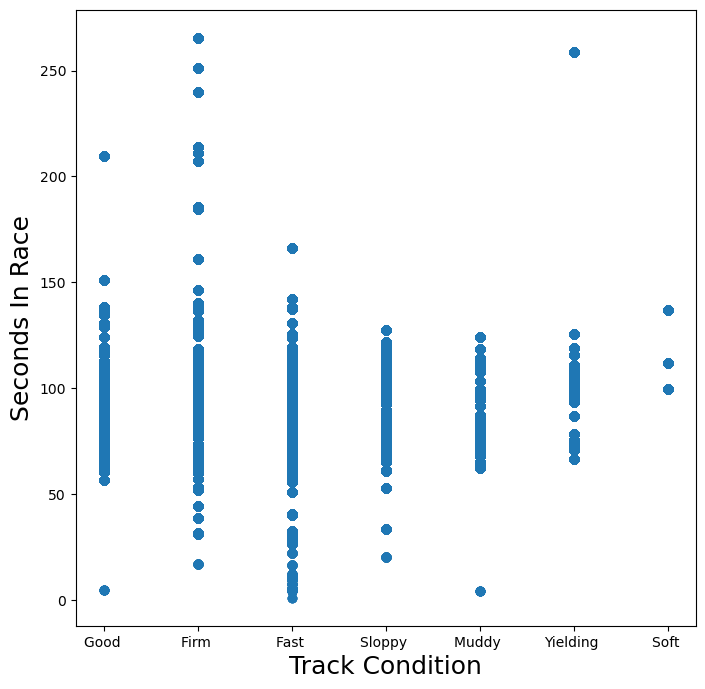

In [38]:
plt.figure(figsize=(8, 8))
x = df["track_condition"]
y = target
plt.scatter(x, y, marker='o')
plt.xticks(rotation=0)
plt.xlabel("Track Condition", fontsize = 18)
plt.ylabel('Seconds In Race', fontsize = 18)

Text(0, 0.5, 'Seconds In Race')

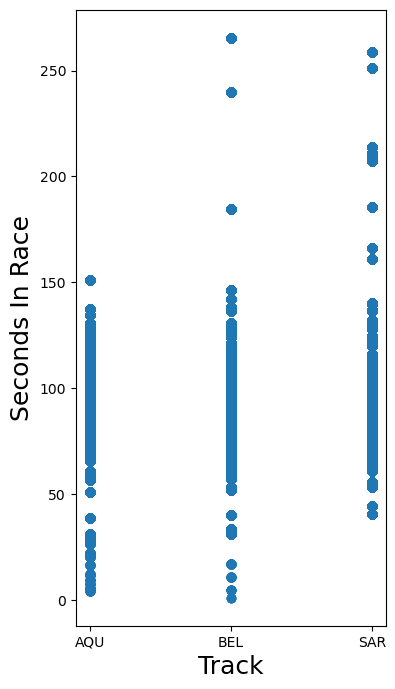

In [41]:
plt.figure(figsize=(4, 8))
x = df["track_id"]
y = target
plt.scatter(x, y, marker='o')
plt.xticks(rotation=0)
plt.xlabel("Track", fontsize = 18)
plt.ylabel('Seconds In Race', fontsize = 18)

(6) What role does the geography and position of the horse in a race play in its outcome?

In [21]:
# resource: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
geometry[:3]

ModuleNotFoundError: No module named 'shapely'

In [ ]:
# resource: https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
import geopandas as gpd

crs = {'init': 'epsg:4326'}

df_geo = gpd.GeoDataFrame(df, crs=crs, geometry = geometry)
df_geo.head()

/Users/claregarberg/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,...,precip,temp,maxt,mint,cloudcover,weathertype,snow,local,seconds_in_race,geometry
0,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,...,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU,74.0,POINT (-73.82759 40.67295)
1,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,...,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU,74.0,POINT (-73.82757 40.67299)
2,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,...,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU,74.0,POINT (-73.82778 40.67251)
3,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,...,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU,74.0,POINT (-73.82776 40.67255)
4,AQU,2019-01-01,9,6,65,40.672596,-73.827742,600,D,GD,...,0.3,50.5,59.1,42.1,67.6,"Mist, Rain, Fog, Heavy Rain, Light Rain",0.0,AQU,74.0,POINT (-73.82774 40.67260)


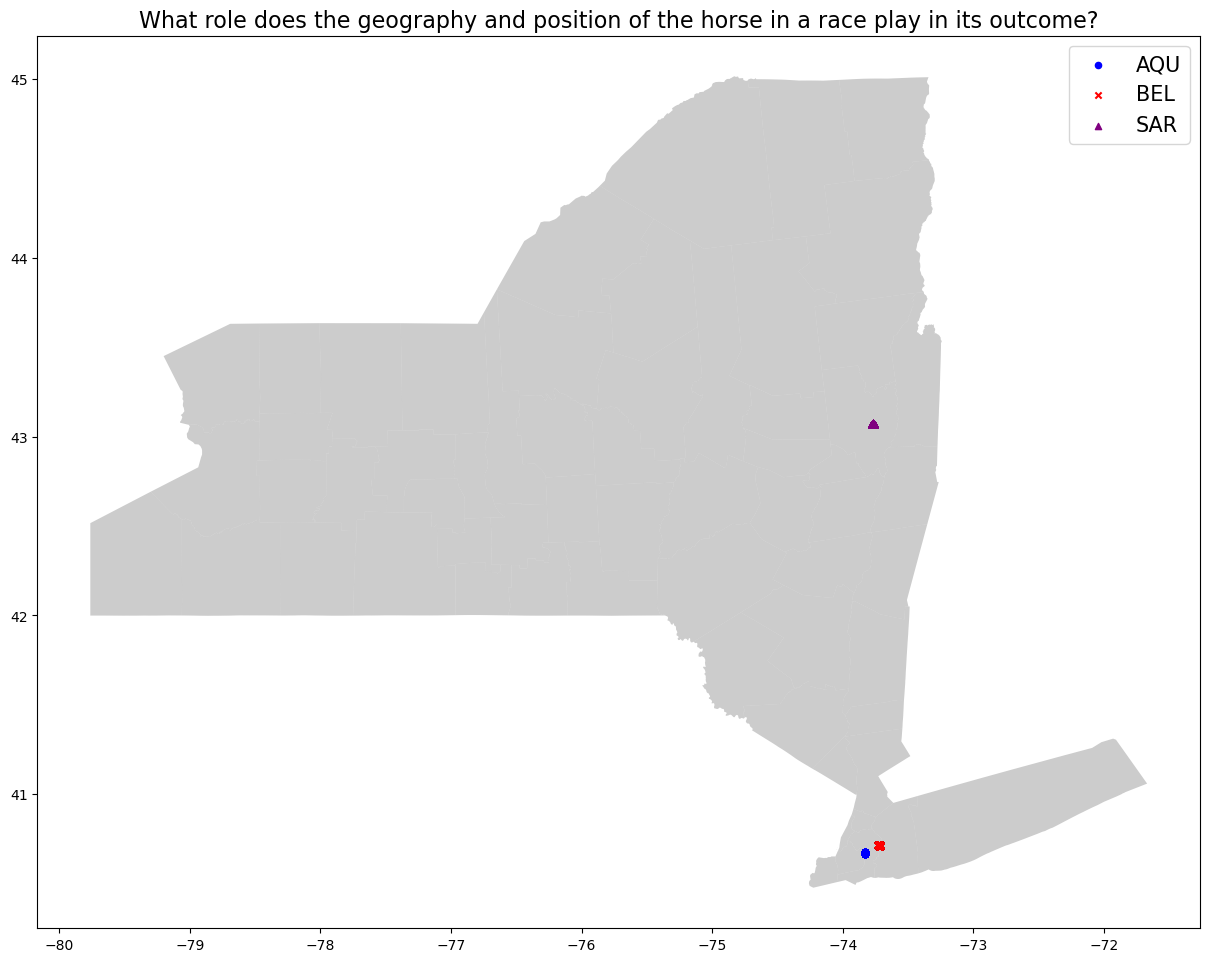

In [ ]:
# getting new york state shapefile and plotting
# shapefile source: https://gis.ny.gov/gisdata/inventories/details.cfm?DSID=927
ny = gpd.read_file("NYS_Civil_Boundaries.shp")

fig, ax = plt.subplots(figsize=(15, 15))
ny.to_crs(epsg=4326).plot(ax = ax, alpha = 0.4, color="gray")
df_geo[df_geo["track_id"] == "AQU"].plot(ax = ax, markersize = 20, color = "blue", marker = "o", label = "AQU")
df_geo[df_geo["track_id"] == "BEL"].plot(ax = ax, markersize = 20, color = "red", marker = "x", label = "BEL")
df_geo[df_geo["track_id"] == "SAR"].plot(ax = ax, markersize = 20, color = "purple", marker = "^", label = "SAR")
plt.legend(prop={"size": 15})
plt.title('What role does the geography and position of the horse in a race play in its outcome?', fontsize = 16)
plt.savefig('EDA/Q6_EDA_ny.png')